# Chapter.3 Single-variate Linear Regression without Bias Term

## Programming Assignment.3-03 Learning Rate

PA 03-03에서는 learning rate이 학습에 미치는 영향을 다각도로 살펴봅니다.  
learning rate은 deep learning에서 가장 중요한 hyper-parameter 중 하나이기 때문에, 변수가 하나밖에 없는 single-variate linear regression without bias term에서 learning rate이 learnable parameter 학습에 미치는 영향을 충분히 분석하고 넘어가셨으면 합니다.

PA 03-03은 learning rate에 대한 분석을 하기 위해 다음과 같은 step들로 이루어져있습니다.

<ul>
    <li> Step.1 Learning Rate Comparison1 </li>
    Learning rate이 충분히 작을 때 learning rate의 변화가 학습에 미치는 영향을 분석합니다.
    <li> Step.2 Learning Rate Comparison2 </li>
    Learning rate이 커졌을 때 불안정한 학습이 일어남을 확인하고, learning rate의 변화가 학습에 미치는 영향을 분석합니다.
    <li> Step.3 Learning Rate Comparison for Data Samples </li>
    같은 learning rate에 대해 data sample이 바뀌면 learning rate이 바뀌는 것과 비슷한 현상이 일어나는 것을 확인합니다.
    <li> Step.4 Parameter Update with Several Learning Rates </li>
    Step.3에서 비교한 data sample들을 모두 이용하여 학습을 진행할 때, learning rate이 바뀜에 따라 학습이 어떻게 일어나는지 확인합니다.
</ul>

먼저 다음의 셀을 실행하여 학습에 필요한 libary들을 import 해주세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
**Programming**  
PA_03_02에서 만들었던 get_loss_funct와 trainer를 복사/붙여넣기 해주고 실행해줍니다.

In [2]:
def get_loss_funct(x, y, ax):
    th_range = np.linspace(3 - 3, 3 + 3, 100)
    loss_funct = np.power(y - th_range*x, 2)

    ax.plot(th_range, 
            loss_funct,
            label = r'$(x,y) = ($' + str(x) + ',' + str(y)+ ')')
    ax.tick_params(axis = 'both', labelsize = 20)
    ax.set_xlabel(r'$\theta$', fontsize = 20)
    ax.set_ylabel(r'$\mathcal{L}$', fontsize = 20)
    ax.legend(loc = 'upper center', fontsize = 20)
    

def trainer(iterations, lr, x, y):
    th = 0.1
    th_list = []
    loss_list = []

    for iteration in range(iterations):
        pred = th*x
        loss = np.power(y - pred, 2)
        th_list.append(th)
        loss_list.append(loss)
        
        th = th + 2*x*lr*(y - pred)
    return th_list, loss_list

### 보충실습: for loop + axes 
Matplotlib의 figure 안에 mxn의 axes를 그릴 때 axes에 대한 indexin이 불편하다는 문제점이 있습니다.  
이는 다음과 같이 axes.flat과 built-in function enumerate()을 이용하면 보다 쉽게 axes들을 사용할 수 있습니다.

0 AxesSubplot(0.125,0.551739;0.352273x0.328261)
1 AxesSubplot(0.547727,0.551739;0.352273x0.328261)
2 AxesSubplot(0.125,0.125;0.352273x0.328261)
3 AxesSubplot(0.547727,0.125;0.352273x0.328261)


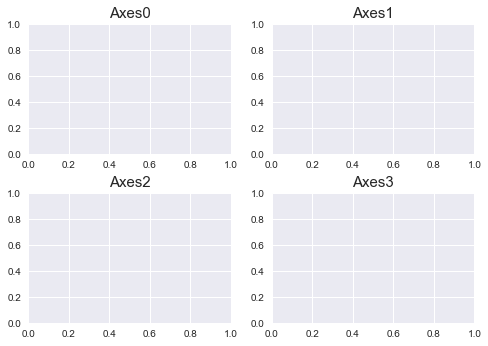

In [3]:
fig, axes = plt.subplots(2,2)
fig.subplots_adjust(hspace = 0.3) # 이 line은 신경쓰지 않아도 괜찮습니다.
for ax_idx, ax in enumerate(axes.flat):
    print(ax_idx, ax)
    ax.set_title("Axes" + str(ax_idx), fontsize = 15)

***
## Step.1 Learning Rate Comparison1

learning rate이 충분히 작을 떄는 learning rate이 커짐에 따라 target theta $\theta^{*}$에 접근하는 속도가 빨라집니다.  
이때는 적은 iteration만에 원하는 target function에 접근할 수 있기 때문에 learning rate을 키우는 것이 바람직합니다.

아래 실습에서는 하나의 data sample에 대하여 learning rate을 변화시킬 때 $\theta$이 어떻게 학습되는지 확인합니다.  
이때 효율적인 비교를 위해 2x2 axes를 가지는 figure에 차례대로 learning rate을 변화시키며 plotting 해줍니다.

***
**Programming**  
get_loss_function과 trainer를 이용하여 다음의 상황에서의 $\theta$ 변화를 확인하세요.
- $(x^{(1)},y^{(1)}) = (1,3)$
- learning rate = 0.01, 0.05, 0.1, 0.3
- iterations = 20


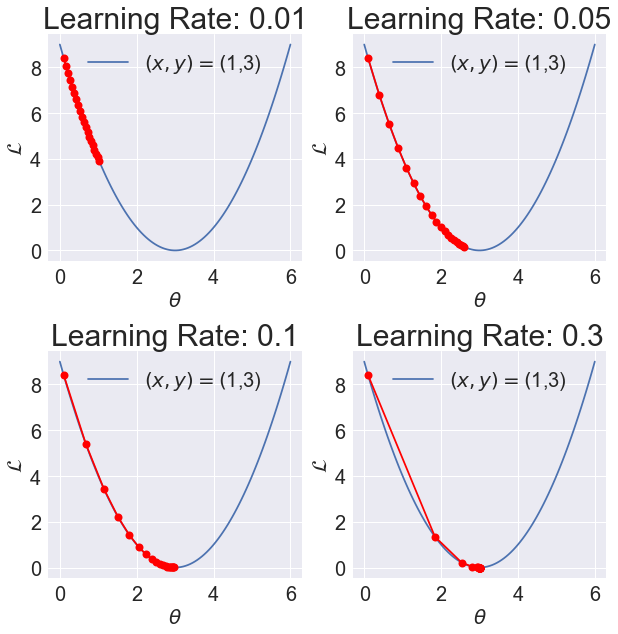

In [5]:
x1 = 1
y1 = 3
lr_list = (0.01, 0.05, 0.1, 0.3)
iterations = 20

fig, axes = plt.subplots(2, 2, figsize = (10,10))
fig.subplots_adjust(hspace = 0.4)
for ax_idx, ax in enumerate(axes.flat):

    get_loss_funct(x1, y1, ax)
    th_list, loss_list = trainer(iterations, lr_list[ax_idx], x1, y1)

    ax.plot(th_list, loss_list,
            marker = 'o',
            markersize = 8,
            color = 'r')
    ax.set_title('Learning Rate: ' + str(lr_list[ax_idx]),
                fontsize = 30)